# Homework 2

For this assignment, you will be developing an artificial neural network to classify data given in the __[Dry Beans Data Set](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#)__. This data set was obtained as a part of a research study by Selcuk University, Turkey, in which a computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features. More details on the study can be found in the following __[research paper](https://www.sciencedirect.com/science/article/pii/S0168169919311573)__. <br>
### **Make sure to use the lecture notebook on an introduction to keras and cross validation located [here](https://colab.research.google.com/drive/1ksEGL7SJ_wutCIyPYx7Loe5EPdOij6dJ?usp=sharing) and [here](https://colab.research.google.com/drive/1C9Mwf1J2ril1Q4l6n2BjQMb8YaFySG5_?usp=sharing)**.

## About the Data Set
Seven different types of dry beans were used in a study in Selcuk University, Turkey, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the **classification** model, images of 13611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features - 12 dimensions and 4 shape forms - were obtained from the grains.

Number of Instances (records in the data set): __13611__

Number of Attributes (fields within each record, including the class): __17__

### Data Set Attribute Information:

1. __Area (A)__ : The area of a bean zone and the number of pixels within its boundaries.
2. __Perimeter (P)__ : Bean circumference is defined as the length of its border.
3. __Major axis length (L)__ : The distance between the ends of the longest line that can be drawn from a bean.
4. __Minor axis length (l)__ : The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. __Aspect ratio (K)__ : Defines the relationship between L and l.
6. __Eccentricity (Ec)__ : Eccentricity of the ellipse having the same moments as the region.
7. __Convex area (C)__ : Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. __Equivalent diameter (Ed)__ : The diameter of a circle having the same area as a bean seed area.
9. __Extent (Ex)__ : The ratio of the pixels in the bounding box to the bean area.
10. __Solidity (S)__ : Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. __Roundness (R)__ : Calculated with the following formula: (4piA)/(P^2)
12. __Compactness (CO)__ : Measures the roundness of an object: Ed/L
13. __ShapeFactor1 (SF1)__
14. __ShapeFactor2 (SF2)__
15. __ShapeFactor3 (SF3)__
16. __ShapeFactor4 (SF4)__

17. __Classes : *Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira*__

### Libraries that can be used :
- NumPy, SciPy, Pandas, Sci-Kit Learn, TensorFlow, Keras. You may also use PyTorch (though support may be limited)
- Any other library used during the lectures and discussion sessions.

### Other Notes
- Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of this assignment.
- Discussion and Lecture materials should be helpful for doing the assignments.
- The homework submission should be a .ipynb file.


In [1]:
!git clone https://github.com/ucsd-cse151a-ss124/hw2.git

Cloning into 'hw2'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 11), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (25/25), 1.56 MiB | 4.08 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


## Exercise 1 : Building a Feed-Forward Neural Network(50 points)

### Exercise 1.1 : Data Preprocessing (10 points)

- As the classes are categorical, use one-hot encoding to represent the set of classes. You will find this useful when developing the output layer of the neural network.
- Normalize each field of the input data using the min-max normalization technique.



In [2]:
drybeans_df = pd.read_csv('Dry_Beans_Dataset.csv')
drybeans_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,44830,814.955,320.731947,178.405838,1.797766,0.831018,45297,238.912806,0.658877,0.989690,0.848226,0.744899,0.007154,0.001359,0.554874,0.997534,SIRA
1,33476,691.826,258.837971,165.220760,1.566619,0.769773,33907,206.453305,0.721155,0.987289,0.878921,0.797616,0.007732,0.001930,0.636191,0.996669,DERMASON
2,27057,606.138,227.460904,151.860320,1.497830,0.744491,27358,185.607226,0.801831,0.988998,0.925436,0.815996,0.008407,0.002299,0.665850,0.997330,DERMASON
3,49483,844.283,326.602913,194.689529,1.677558,0.802907,50289,251.005403,0.680179,0.983973,0.872348,0.768534,0.006600,0.001420,0.590644,0.990840,SIRA
4,22461,544.584,192.801303,148.541136,1.297966,0.637517,22699,169.110122,0.774731,0.989515,0.951720,0.877121,0.008584,0.003134,0.769342,0.998579,DERMASON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,39956,745.166,273.867402,186.564001,1.467954,0.732079,40504,225.551678,0.796000,0.986470,0.904244,0.823580,0.006854,0.001945,0.678284,0.995690,DERMASON
13607,171914,1595.676,598.541646,368.358372,1.624889,0.788194,174673,467.854361,0.815980,0.984205,0.848461,0.781657,0.003482,0.000802,0.610988,0.992788,BOMBAY
13608,48266,817.340,304.682706,202.282198,1.506226,0.747812,48780,247.899536,0.807232,0.989463,0.907916,0.813632,0.006313,0.001706,0.661997,0.997117,SIRA
13609,43279,843.066,336.280446,164.667135,2.042183,0.871907,43813,234.743550,0.614566,0.987812,0.765181,0.698059,0.007770,0.001138,0.487286,0.995128,HOROZ


In [3]:
drybeans_df = pd.get_dummies(drybeans_df, prefix=['Class'], columns=['Class'], dtype=float)
drybeans_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,44830,814.955,320.731947,178.405838,1.797766,0.831018,45297,238.912806,0.658877,0.989690,...,0.001359,0.554874,0.997534,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33476,691.826,258.837971,165.220760,1.566619,0.769773,33907,206.453305,0.721155,0.987289,...,0.001930,0.636191,0.996669,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,27057,606.138,227.460904,151.860320,1.497830,0.744491,27358,185.607226,0.801831,0.988998,...,0.002299,0.665850,0.997330,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,49483,844.283,326.602913,194.689529,1.677558,0.802907,50289,251.005403,0.680179,0.983973,...,0.001420,0.590644,0.990840,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22461,544.584,192.801303,148.541136,1.297966,0.637517,22699,169.110122,0.774731,0.989515,...,0.003134,0.769342,0.998579,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,39956,745.166,273.867402,186.564001,1.467954,0.732079,40504,225.551678,0.796000,0.986470,...,0.001945,0.678284,0.995690,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13607,171914,1595.676,598.541646,368.358372,1.624889,0.788194,174673,467.854361,0.815980,0.984205,...,0.000802,0.610988,0.992788,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13608,48266,817.340,304.682706,202.282198,1.506226,0.747812,48780,247.899536,0.807232,0.989463,...,0.001706,0.661997,0.997117,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13609,43279,843.066,336.280446,164.667135,2.042183,0.871907,43813,234.743550,0.614566,0.987812,...,0.001138,0.487286,0.995128,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
# MinMax Normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
drybeans_df = pd.DataFrame(scaler.fit_transform(drybeans_df), columns = drybeans_df.columns)
drybeans_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,0.104229,0.198694,0.246967,0.165518,0.549934,0.883887,0.101465,0.190304,0.333127,0.933884,...,0.256253,0.256074,0.957751,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.055748,0.114396,0.135499,0.126473,0.385468,0.795443,0.054511,0.110772,0.533453,0.902047,...,0.440609,0.400144,0.941143,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.028340,0.055731,0.078990,0.086908,0.336523,0.758933,0.027513,0.059695,0.792964,0.924703,...,0.559513,0.452690,0.953829,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.124097,0.218773,0.257541,0.213740,0.464403,0.843291,0.122044,0.219934,0.401647,0.858085,...,0.276116,0.319448,0.829136,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.008715,0.013589,0.016569,0.077079,0.194315,0.604452,0.008307,0.019274,0.705791,0.931560,...,0.828764,0.636047,0.977839,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,0.083417,0.150914,0.162566,0.189677,0.315266,0.741008,0.081706,0.157567,0.774206,0.891199,...,0.445374,0.474719,0.922317,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13607,0.646868,0.733202,0.747292,0.728031,0.426928,0.822045,0.634805,0.751256,0.838477,0.861162,...,0.076613,0.355491,0.866564,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13608,0.118900,0.200327,0.218063,0.236224,0.342497,0.763728,0.115823,0.212324,0.810335,0.930870,...,0.368388,0.445864,0.949738,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13609,0.097606,0.217940,0.274969,0.124833,0.723842,0.942934,0.095347,0.180089,0.190594,0.908981,...,0.185084,0.136328,0.911521,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Exercise 1.2 : Training and Testing the Neural Network (40 points)

Design a 4-layer (4 hidden layers and this does not include the input or output layer) artificial deep neural network, specifically a feed-forward multi-layer perceptron (using the sigmoid activation function), to classify the type of 'Dry Bean' given the other attributes in the data set, similar to the one mentioned in the paper above. Please note that this is a **multi-class classification** problem so select the right number of nodes accordingly for the input and output layers.

For training and testing the model, split the data into training and testing set by __90:10__ and use the training set for training the model and the test set to evaluate the model performance.

Consider the following hyperparameters while developing your model :

- Model type: Keras Sequential
- Make sure your input layer matches the size of your X matrix
- Number and type of hidden layers: 4 and Dense
- Number of nodes in each hidden layer: 12
- Learning rate should be 0.3
- Number of epochs should be 100
- The sigmoid function is to be used as the activation function in each layer
- Your output layer has to use a sigmoid function and the number of outputs should match the shape of your y
- Stochastic Gradient Descent should be used to minimize the error rate

__Requirements once the model has been trained :__

- A confusion matrix for all classes, specifying the true positive, true negative, false positive, and false negative cases for each category in the class
- Since we do have OHE output (multi-class output) you will need to either reshape or argmax your outputs. Make sure they have already been thresholded as well i.e. look at yhat and do you see 1's and 0's?
- The accuracy and mean squared error (MSE) of the model
- The precision and recall for each label in the class

__Notes :__

- Splitting of the dataset should be done __after__ the data preprocessing step.
- The mean squared error (MSE) values obtained __should be positive__.


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD

In [6]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(drybeans_df.iloc[:,:16], drybeans_df.iloc[:,16:], test_size = 0.1, random_state=42)

In [7]:
X_train.shape

(12249, 16)

In [8]:
y_train.shape

(12249, 7)

In [9]:
classifier = Sequential()
classifier.add(Input(shape=(16,)))
classifier.add(Dense(units=12,activation='sigmoid'))
classifier.add(Dense(units=12,activation='sigmoid'))
classifier.add(Dense(units=12,activation='sigmoid'))
classifier.add(Dense(units=12,activation='sigmoid'))
classifier.add(Dense(units=7, activation='sigmoid'))

In [10]:
classifier.compile(optimizer=SGD(learning_rate=0.3), loss='categorical_crossentropy', metrics = ['accuracy'])

In [11]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 763 (2.98 KB)

 Trainable params: 763 (2.98 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
classifier.outputs

[<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_15>]

In [14]:
history = classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100


2024-07-22 21:27:01.722535: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.2355 - loss: 1.8667
Epoch 2/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 563us/step - accuracy: 0.2502 - loss: 1.8431
Epoch 3/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - accuracy: 0.2563 - loss: 1.8447
Epoch 4/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step - accuracy: 0.2538 - loss: 1.8361
Epoch 5/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.2522 - loss: 1.8319
Epoch 6/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.4821 - loss: 1.2126
Epoch 7/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.5487 - loss: 0.9981
Epoch 8/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.6089 - loss: 0.9127
Epoch 9/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.6722 - loss: 0.8114
Epoch 10/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.7268 - loss: 0.7334
Epoch 11/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.7688 - loss: 0.6328
Epoch 12/

In [15]:
yhat_test = classifier.predict(X_test)
yhat_train = classifier.predict(X_train)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix_test = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(yhat_test, axis = 1))
print("Test Confusion Matrix")
display(confusion_matrix_test)
confusion_matrix_train = confusion_matrix(np.argmax(y_train, axis = 1), np.argmax(yhat_train, axis = 1))
print("Train Confusion Matrix")
display(confusion_matrix_train)

Test Confusion Matrix


array([[125,   0,   6,   0,   2,   2,   2],
       [  0,  63,   0,   0,   0,   0,   0],
       [  0,   0, 187,   0,   5,   1,   2],
       [  0,   0,   0, 332,   0,   4,   6],
       [  0,   0,   2,   2, 172,   0,   5],
       [  1,   0,   0,   4,   0, 192,   3],
       [  0,   0,   0,  45,   4,   8, 187]])

Train Confusion Matrix


array([[1040,    0,   94,    1,    1,   20,   29],
       [   0,  459,    0,    0,    0,    0,    0],
       [  24,    0, 1359,    0,   31,    3,   18],
       [   0,    0,    0, 3058,    1,   66,   79],
       [   2,    0,   20,   18, 1648,    0,   59],
       [   3,    0,    0,   21,    0, 1764,   39],
       [   3,    0,    1,  360,   15,   62, 1951]])

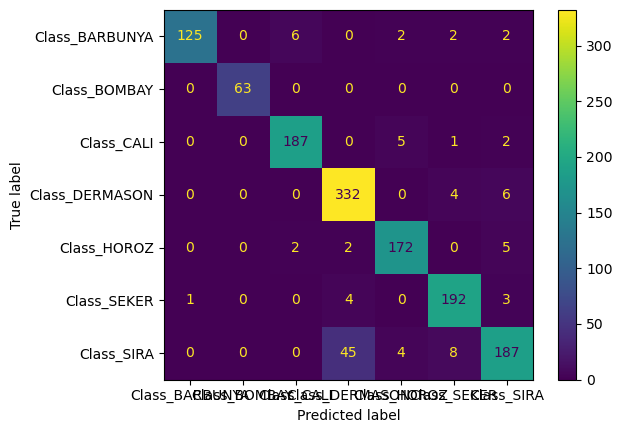

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test, display_labels=y_test.columns)
cm_disp_test.plot()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1),np.argmax(yhat_test, axis = 1)))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       137
           1       1.00      1.00      1.00        63
           2       0.96      0.96      0.96       195
           3       0.87      0.97      0.92       342
           4       0.94      0.95      0.95       181
           5       0.93      0.96      0.94       200
           6       0.91      0.77      0.83       244

    accuracy                           0.92      1362
   macro avg       0.94      0.93      0.94      1362
weighted avg       0.93      0.92      0.92      1362



In [19]:
np.mean((y_test-yhat_test)**2)

0.29176642906592426

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(np.argmax(y_test, axis = 1),np.argmax(yhat_test, axis = 1)))

0.9236417033773862


## Exercise 2 : k-fold Cross Validation (20 points)

In order to avoid **using biased models**, use 10-fold cross validation to generalize the model from Ex1.2 on the given data set. You can choose a n_repeats value of 1-5

__Requirements :__
- Print the accuracy values during each iteration of the **cross validation** not the iterations per epoch or the epochs
- Print the overall average accuracy per each n_fold value, look at the documentation for the scoring parameter



In [67]:
pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/ea/09/1c02aa24daf7a003c06f629fbb69dc9ae1bda1b247d7b8981e550d752ac9/scikeras-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for keras>=3.2.0 from https://files.pythonhosted.org/packages/46/43/03fa53f027e78af4a6bee3564d05cb34d9f5b924dc69c85f8ef5cb950ff1/keras-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/2b/ce/4e2356b033c4822cce66249e58c5c5f37921cdb1b05acdaa27fcb31ea5fd/optree-0.12.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.6 MB/s eta 0:00:00
  Obtaining dependency information for ml-dtypes from https://files.pythonhosted.org/packages/42/6b/b2fa3e

In [13]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score

In [15]:
def buildmodel():
    model = Sequential()
    model.add(Input(shape=(16,)))
    model.add(Dense(12, activation = 'sigmoid'))
    model.add(Dense(12, activation = 'sigmoid'))
    model.add(Dense(12, activation = 'sigmoid'))
    model.add(Dense(12, activation = 'sigmoid'))
    model.add(Dense(7, activation = 'sigmoid'))
    
    model.compile(optimizer=SGD(learning_rate=0.3), loss='categorical_crossentropy', metrics = ['accuracy'])
    return(model)

estimator = KerasClassifier(model=buildmodel, epochs=100, batch_size=10, verbose=0)
kfold = RepeatedKFold(n_splits = 10, n_repeats = 1)
results = cross_val_score(estimator, X_train, y_train, cv=kfold, n_jobs = -1, verbose=3)  # 1 cpus

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
2024-07-22 21:47:14.180848: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-07-22 21:47:14.223761: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-07-22 21:47:14.259881: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-07-22 21:47:14.260287: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-07-22 21:47:14.262702: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-07-22 21:47:14.265867: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-07-22 21:47:14.274177: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-07-22 21:47:14.281159: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128

In [16]:
results

array([0.91755102, 0.93469388, 0.89714286, 0.91265306, 0.91755102,
       0.92163265, 0.91673469, 0.92244898, 0.92408163, 0.93055556])

In [17]:
results.mean()

0.9195045351473923

In [18]:
estimator.get_params()

{'model': <function __main__.buildmodel()>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': 'rmsprop',
 'loss': None,
 'metrics': None,
 'batch_size': 10,
 'validation_batch_size': None,
 'verbose': 0,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 100,
 'class_weight': None}

## Exercise 3 : Hyperparameter Tuning (25 points)

Use either grid search or random search methodology to find the optimal number of nodes required in each hidden layer, as well as the optimal learning rate and the different activation functions or optimization approaches, [keras_tuner examples](https://keras.io/guides/keras_tuner/getting_started/) such that the accuracy of the model is maximum for the given data set.

__Requirements :__
- The set of optimal hyperparameters
- The maximum accuracy achieved using this set of optimal hyperparameters

__Note :__ Hyperparameter tuning takes a lot of time to execute. Make sure that you choose the appropriate number of each hyperparameter (preferably 3 of each), and that you allocate enough time to execute your code. Make sure to tune at least three parameters with three options each at a minimum, but feel free to experiment with more, just recognize that it will grow exponentially in running time

In [25]:
!pip install keras_tuner

In [26]:
import keras_tuner

ImportError: dlopen(/Users/froguro/anaconda3/lib/python3.11/site-packages/grpc/_cython/cygrpc.cpython-311-darwin.so, 0x0002): Symbol not found: __ZN4absl12lts_2021110219str_format_internal13FormatArgImpl8DispatchINS0_11string_viewEEEbNS2_4DataENS1_24FormatConversionSpecImplEPv
  Referenced from: <9F658FF6-372A-356B-B085-52035629693E> /Users/froguro/anaconda3/lib/libgpr.26.0.0.dylib
  Expected in:     <A88D105C-34CE-3E35-A26D-BD14485CB27F> /Users/froguro/anaconda3/lib/libabsl_str_format_internal.2111.0.0.dylib

## Exercise 4 - Collaborative Statement (5 points)

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.